# I. Numpy

### Импортируйте NumPy

In [168]:
from statistics import median

import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [11]:
arr = np.zeros(10, dtype=int)
arr[4] = 1
arr.reshape(2,5)

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [18]:
arr = np.arange(10,50)
arr = np.flip(arr)
# arr = arr[::-1]
arr[arr % 2 == 0]


array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [22]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [39]:
np.random.seed()
arr = np.random.rand(4, 3, 2)
arr.min()

np.float64(0.018713193056306587)

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [41]:
np.dot(np.random.rand(6,4), np.random.rand(4,3))

array([[1.27451064, 0.8885244 , 0.89656526],
       [0.88886575, 0.54490545, 0.7670164 ],
       [1.22045965, 0.70019878, 0.72108626],
       [1.04922757, 0.78067132, 0.71703099],
       [1.42076044, 0.84041691, 1.08876727],
       [0.68330097, 0.57219148, 0.46070603]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [45]:
arr = np.random.rand(7,7)
mean = np.mean(arr) # или arr.mean()
std = np.std(arr) # или arr.std()
print(f"среднее: {mean}") 
print(f"среднее: {np.average(arr)}")
print(f"стандартное отклонение: {std}")
print(f"нормализованный массив: {(arr - mean) / std}")

среднее: 0.523633239907283
среднее: 0.523633239907283
стандартное отклонение: 0.26151305344211423
нормализованный массив: [[-1.16335416 -0.80468162  0.49521838  1.15630127  0.19737405  0.85772024
  -1.23553945]
 [ 0.77682589  0.97487708  1.45930434 -0.04751521 -1.33283498  1.7030786
  -1.07450301]
 [ 0.00523624 -1.66539787 -0.05301355 -0.2028663   1.12873274  1.4679182
  -0.59818033]
 [-1.01943954 -1.20160257  1.14576175  0.36771955  0.33083519 -1.41416842
   1.01127668]
 [ 1.70728508 -1.13197467 -0.46200197  1.16425969  0.47703668  1.04757013
  -0.50716937]
 [ 1.40657497 -1.51302646 -0.32105117 -0.09689408 -1.25856136 -0.17650265
  -0.86703422]
 [-0.03659733 -1.34977661  1.29465286 -0.86629261  1.08914386 -0.31641371
  -0.54831023]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [48]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [180]:
tips = sns.load_dataset("tips")

### Посмотрите на первые 5 строчек

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [64]:
tips.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [68]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

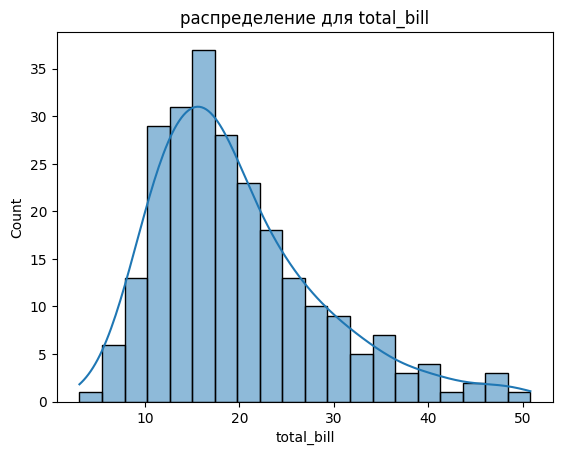

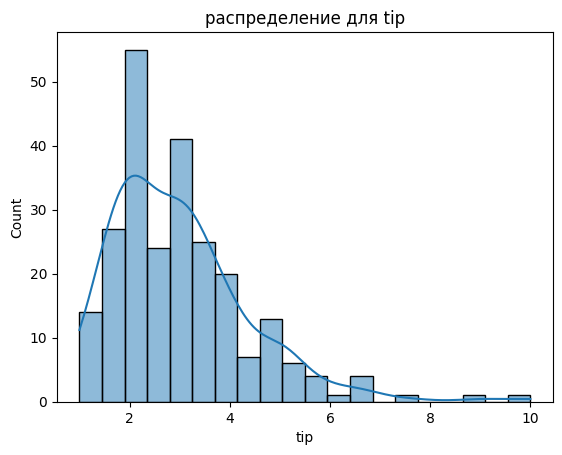

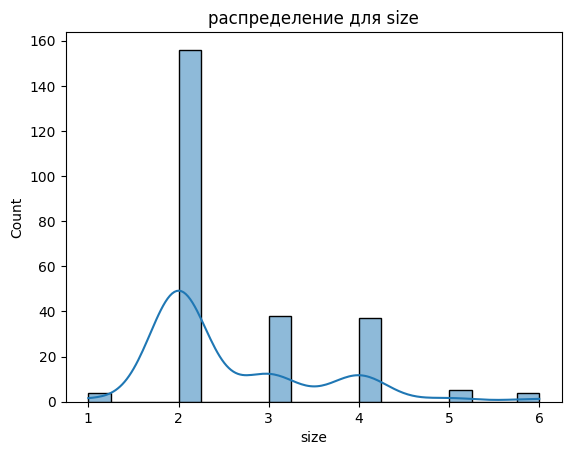

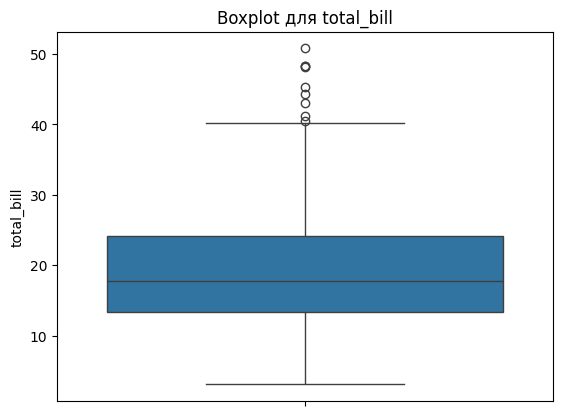

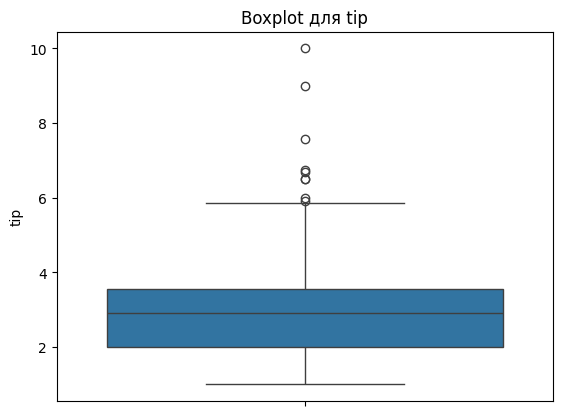

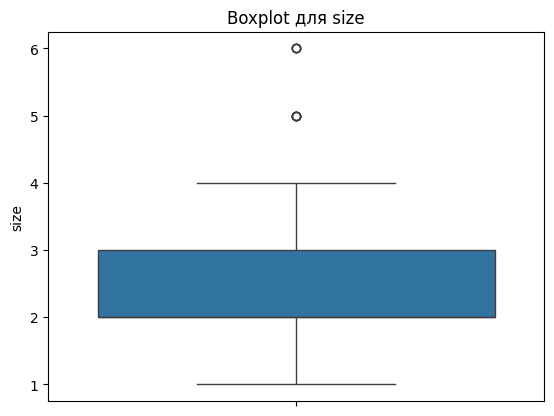

In [87]:
for column in tips.select_dtypes(include='number').columns:
    sns.histplot(tips[column], bins = 20, kde = True)
    plt.title(f'распределение для {column}')
    plt.show()
    
for column in tips.select_dtypes(include='number').columns:
    sns.boxplot(data = tips[column])
    plt.title(f'Boxplot для {column}')
    plt.show()

### Найдите максимальное значение 'total_bill'

In [89]:
tips['total_bill'].max()

np.float64(50.81)

### Найдите количество курящих людей

In [94]:
tips['smoker'].value_counts()['Yes']

np.int64(93)

### Узнайте какой средний 'total_bill' в зависимости от 'day'

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


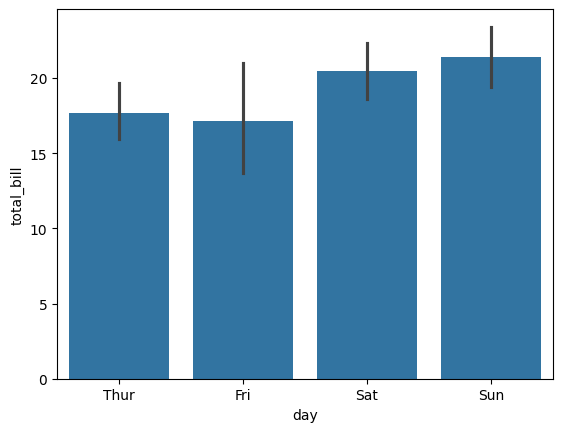

In [119]:
print(tips.groupby('day', observed=True)['total_bill'].mean())

sns.barplot(x = 'day', y = 'total_bill', data = tips, estimator = 'mean')
plt.show()

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [187]:
tips_median = tips['total_bill'].median()
tips[tips['total_bill'] > tips_median]


,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,False,Sun,Dinner,3
3,23.68,3.31,Male,False,Sun,Dinner,2
4,24.59,3.61,Female,False,Sun,Dinner,4
5,25.29,4.71,Male,False,Sun,Dinner,4
7,26.88,3.12,Male,False,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,False,Sat,Dinner,3
240,27.18,2.00,Female,True,Sat,Dinner,2
241,22.67,2.00,Male,True,Sat,Dinner,2
242,17.82,1.75,Male,False,Sat,Dinner,2


In [134]:
print(tips.groupby('sex', observed=True)['tip'].mean())


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [183]:
def smoker_to_bool(smoker):
    if smoker == "Yes":
        return True
    else:
        return False

tips['smoker'] = tips['smoker'].apply(smoker_to_bool)

# tips['smoker'] = tips['smoker'].apply(lambda x: True if x == "Yes" else False)

tips['smoker']

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240     True
241     True
242    False
243    False
Name: smoker, Length: 244, dtype: category
Categories (2, bool): [True, False]

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

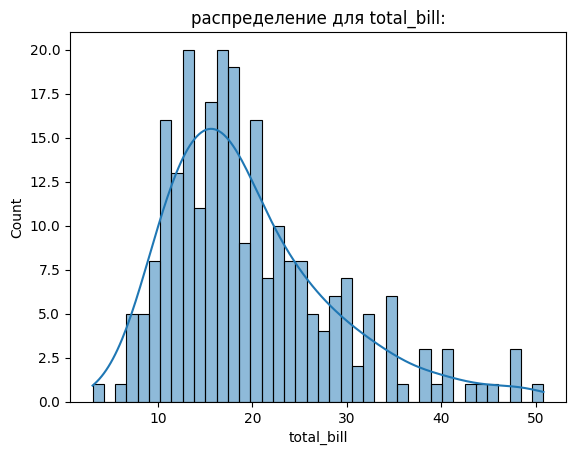

In [186]:
sns.histplot(tips['total_bill'], bins=40, kde=True)
plt.title(f'распределение для total_bill:')
plt.show()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

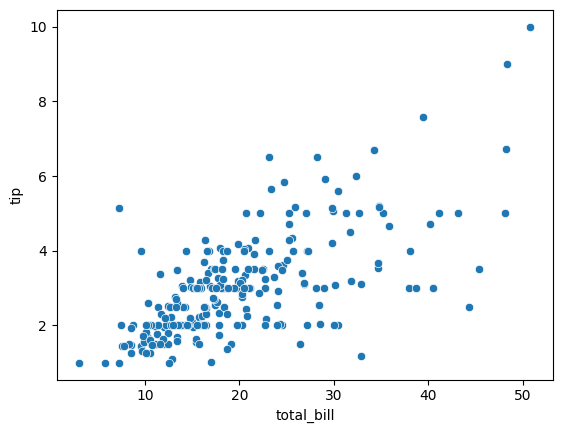

In [136]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

### Постройте pairplot

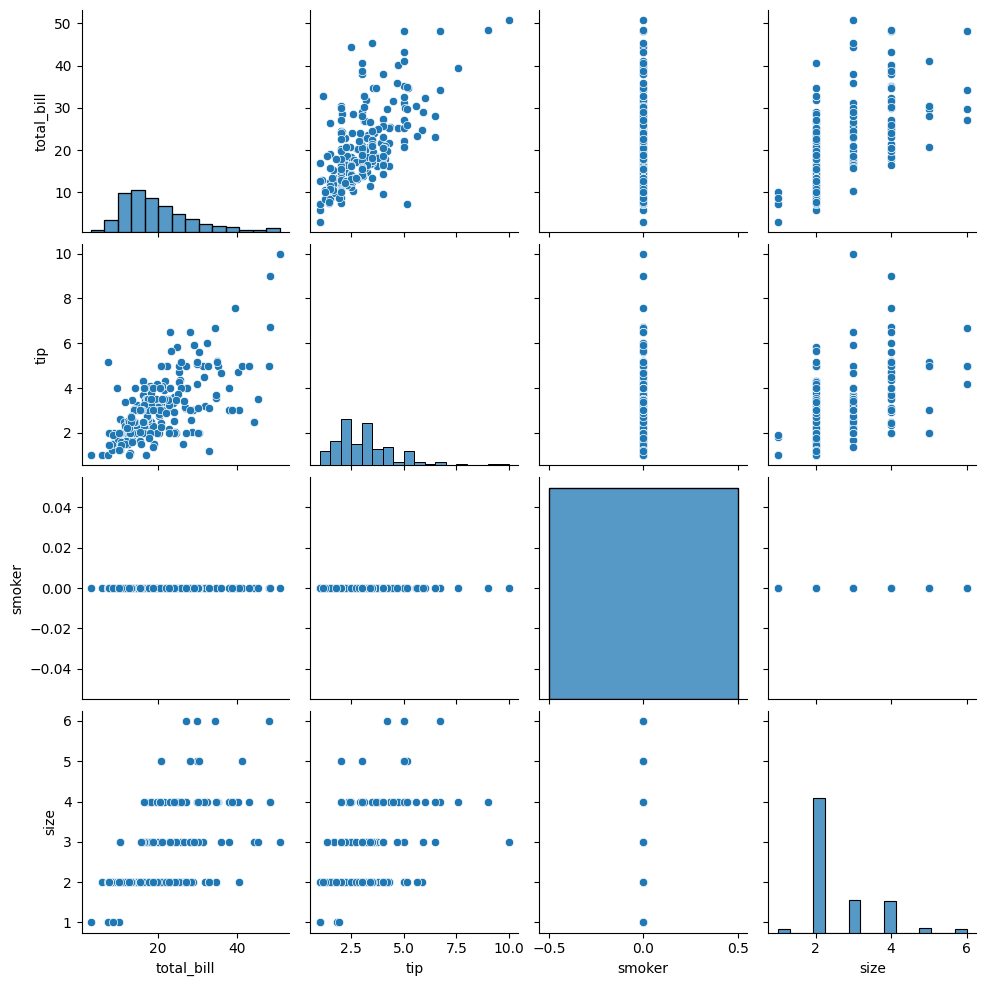

In [137]:
sns.pairplot(data=tips)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<Axes: xlabel='day', ylabel='total_bill'>

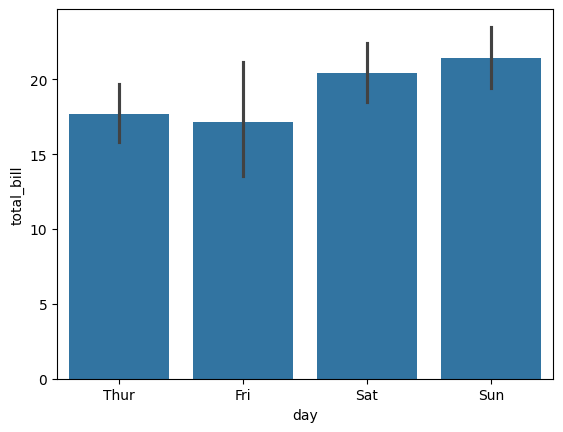

In [192]:
sns.barplot(x='day', y='total_bill', data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

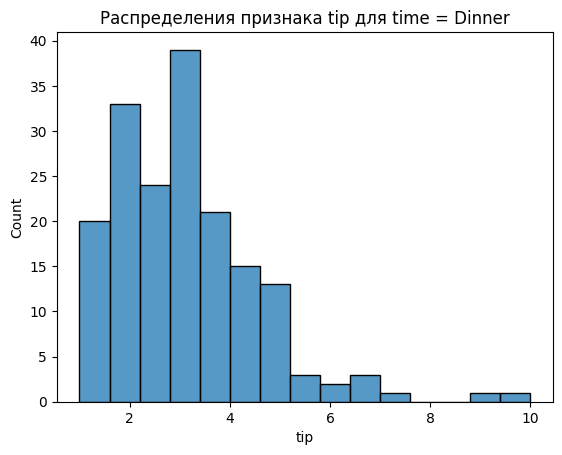

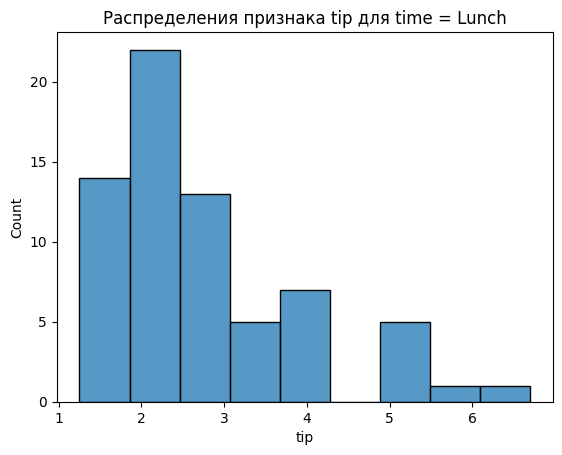

In [158]:
for time in tips['time'].unique():
    sns.histplot(x = 'tip', data=tips[tips['time'] == time])
    plt.title(f'Распределения признака tip для time = {time}')
    plt.show()

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

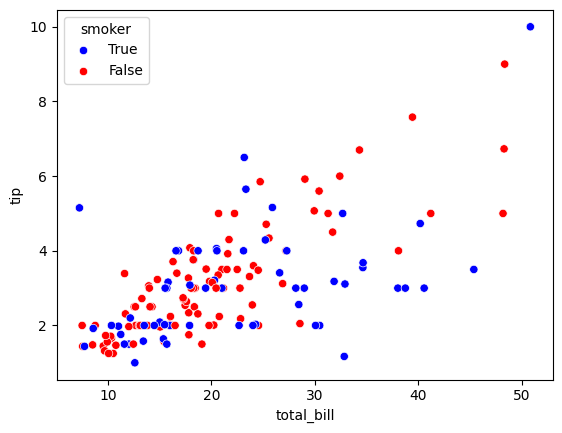

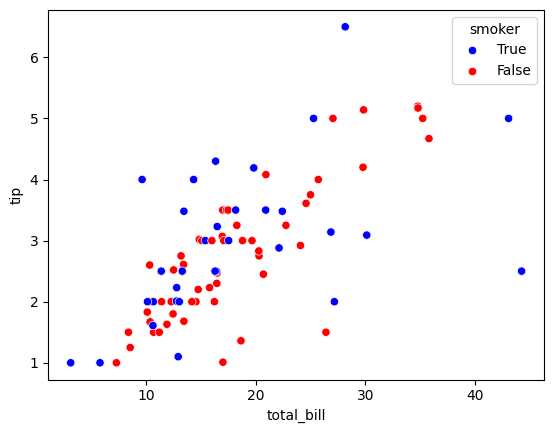

In [184]:
sns.scatterplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Male'], hue='smoker', palette={True:'blue', False:'red'})
plt.show()
sns.scatterplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Female'], hue='smoker', palette={True:'blue', False:'red'})
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

1) По результатам EDA пропусков в данных выявлено не было
2) Наибольшие выбросы обнаружены для таких числовых признаков, как size и tip
3) Заведение чаще посещают небольшие группы людей
4) Наблюдается корреляция между признаками 'total_bill' и 'tip' - чем выше сумма счета, тем выше и чаевые  
5) Больше чаевых оставляют за ужином, нежели после ланча 
6) Наибольшие выбросы для суммы чаевых были обнаружены для курящих клиентов 
7) Сильной корреляции между признаками tips/total_bill и day не обнаружено